In [337]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inputim/image.jpg
/kaggle/input/stegano/steg1.jpg


In [338]:
import cv2
import types

# Checking Text to Binary-->

In [339]:
name="MynameisRahul"

In [340]:
print("The Original String is:- "+name)

The Original String is:- MynameisRahul


In [341]:
res=''.join(format(ord(i),'b')for i in name)

In [342]:
print(res)

1001101111100111011101100001110110111001011101001111001110100101100001110100011101011101100


# Checking Binary to Text-->

In [343]:
def BinaryTointeger(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal)     

bin_data =res
   
print("The binary value is:", bin_data) 
   

str_data =' '
   

for i in range(0, len(bin_data), 7): 
    temp_data = int(bin_data[i:i + 7]) 
    decimal_data = BinaryTointeger(temp_data) 
    str_data = str_data + chr(decimal_data)  
   

print("The Binary value after string conversion is:",str_data) 

The binary value is: 1001101111100111011101100001110110111001011101001111001110100101100001110100011101011101100
The Binary value after string conversion is:  MynameisRahul


# Function to convert the input message to Binary..

In [344]:
def message2binary(message):
  if type(message) == str:
    result= ''.join([ format(ord(i), "08b") for i in message ])
    
  elif type(message) == bytes or type(message) == np.ndarray:
    result= [ format(i, "08b") for i in message ]
    
  elif type(message) == int or type(message) == np.uint8:
    result=format(message, "08b")

  else:
    raise TypeError("Input type is not supported")
    
  return result  

In [345]:
# message2binary("heloouserthisisrahul")

In [346]:
# message2binary("mynameisrahul")

In [347]:
# r,g,b=message2binary([50,35,155])

# Importing Image-->

In [348]:
from IPython.display import Image
import os

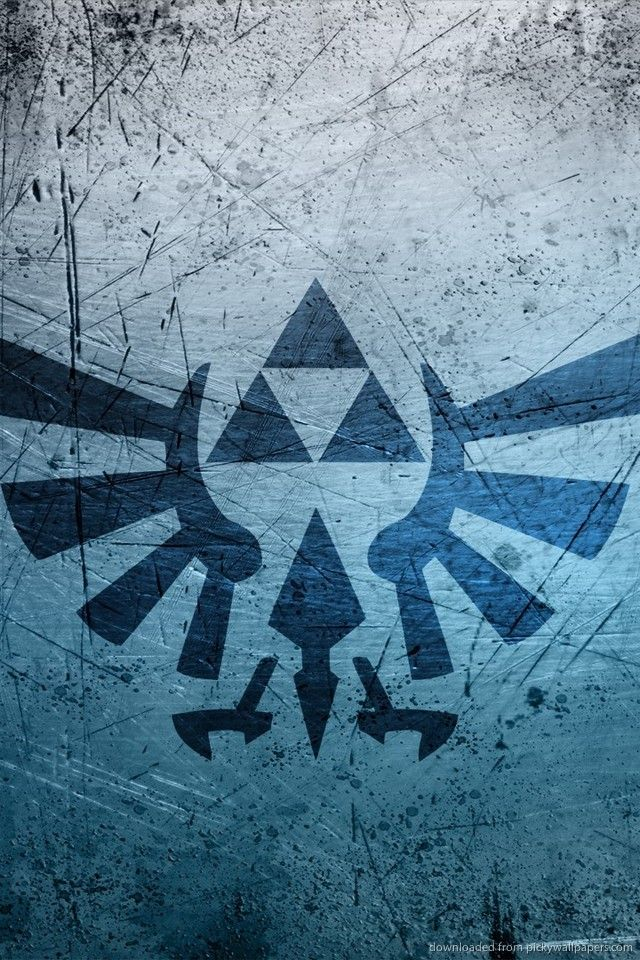

In [349]:
Image('/kaggle/input/inputim/image.jpg')


In [350]:
image=cv2.imread("/kaggle//input/inputim/image.jpg")
image.shape

(960, 640, 3)

In [351]:
image=cv2.resize(image,(600,600))
image.shape

(600, 600, 3)

In [352]:
#image

In [353]:
# for i in image:
#     for pixel in i:
#         print(pixel)

# How to overwrite the LSB bit of a binary number and converting it to decimal..--> 

In [354]:
h='1000110'
int(h[:-1]+'1',2)

71

# [:-1] neglects the LSB bit then we can add a bit and by int(value,2) we will change it to new decimal value..

In [355]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")    
    if (len(data) == 0): 
      raise ValueError('Data is empty')
  
    filename = input("Enter the name of the New Image after Encoding(with extension): ")
    
    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8
    
    print("Maximum bytes to encode:", no_bytes)
    
    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
    
    # Using the below as delimeter
    data +='*****'    
    
    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)
    
    print("The Length of Binary data",data_len)
    
    data_index = 0
    
    for i in img:
        for pixel in i:
            
          r, g, b = message2binary(pixel)
         # print(r)
         # print(g)
         # print(b)
          if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
#               print("Original Binary",r)
              print("The old pixel",pixel[0])
              pixel[0] = int(r[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Red Pixel
#               print("Changed binary",r[:-1] + data_binary[data_index])
              print("The new pixel in integer",pixel[0])
              data_index += 1
            
          if data_index < data_len:
             # hiding the data into LSB of Green Pixel
              pixel[1] = int(g[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Green Pixel
              data_index += 1
                
          if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
              pixel[2] = int(b[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Blue pixel
              data_index += 1
                
              # if data is encoded, just breaking out of the Loop
          if data_index >= data_len:
              break
            
    
    
    cv2.imwrite(filename,img)
    
    print("Encoded the data successfully")

In [356]:
def decode_data():
   image_name = input("Enter image name(with extension): ") 
   image1 = cv2.imread(image_name) 
   l = int(input("Enter the size of the binary data that you have encoded and want to decode:")) 
#    image1 = cv2.imread("/kaggle/input/stegano/steg1.jpg") #read the image using cv2.imread() 
   print(image1.shape)
#    print("The Steganographed image is as shown below: ")
#    resized_image = cv2.resize(image1, (600, 600))
   data_index2=0
    
   binary_data = ""

   for values in image1:
      for pixel in values:
        
          r, g, b =message2binary(pixel) #convert the red,green and blue values into binary format
            
          if(data_index2<l) :
            print(pixel[0])
            binary_data += r[-1] #extracting data from the least significant bit of red pixel
            data_index2+=1
            
          if(data_index2<l):
            binary_data += g[-1] #extracting data from the least significant bit of red pixel
            data_index2+=1
          
          if(data_index2<l):
            binary_data += b[-1] #extracting data from the least significant bit of red pixel    
            data_index2+=1
            
          if data_index2 >= l:
              break   
            
  # split by 8-bits
   print("rahul") 
   print(binary_data)
   all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]
#    print(all_bytes)
  # convert from bits to characters
   decoded_data = ""
   for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == '*****': #check if we have reached the delimeter which is "#####"
          break
  #print(decoded_data)
   print(decoded_data[:-5]) #remove the delimeter to show the original hidden message 
    
   print("Decoded the data successfully") 

In [357]:
encode_data(image)

Enter the data to be Encoded:hellouser
Enter the name of the New Image after Encoding(with extension): steg1.jpg
Maximum bytes to encode: 135000
0110100001100101011011000110110001101111011101010111001101100101011100100010101000101010001010100010101000101010
The Length of Binary data 112
The old pixel 104
The new pixel in integer 104
The old pixel 120
The new pixel in integer 120
The old pixel 110
The new pixel in integer 110
The old pixel 112
The new pixel in integer 113
The old pixel 122
The new pixel in integer 122
The old pixel 113
The new pixel in integer 113
The old pixel 72
The new pixel in integer 73
The old pixel 56
The new pixel in integer 57
The old pixel 61
The new pixel in integer 60
The old pixel 65
The new pixel in integer 64
The old pixel 66
The new pixel in integer 66
The old pixel 64
The new pixel in integer 65
The old pixel 71
The new pixel in integer 71
The old pixel 88
The new pixel in integer 89
The old pixel 64
The new pixel in integer 65
The old pixel 72
The new 

In [358]:
decode_data()

Enter the size of the binary data that you have encoded and want to decode:112
(600, 600, 3)
104
120
110
111
120
117
70
53
62
65
67
66
69
88
66
72
80
117
109
118
131
127
122
137
127
115
100
77
127
156
162
162
155
159
150
142
149
127
rahul
0010010011100011100011100011101100011100010010010011101100011101100011101101100011101100010010011101100010011101
$ã;I;
Decoded the data successfully
